# Laboratorio 8


Juan Camilo Gallego
CC: 1000098978

In [16]:
# Import the necessary modules
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from tensorflow import keras
import tensorflow.keras.backend as K
from sklearn.preprocessing import StandardScaler

## Pregunta 1

Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

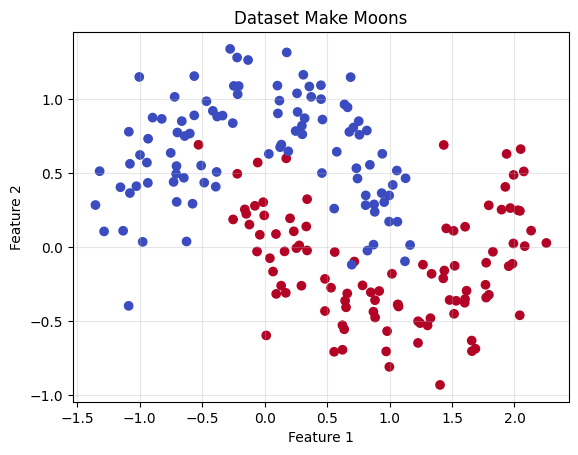

In [41]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title('Dataset Make Moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

Epoch 1/100


/home/camilo/UdeA/2025-1/aprendizaje_estadistico/labs/labs_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8188 - loss: 0.5535 - val_accuracy: 0.8750 - val_loss: 0.3686
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8188 - loss: 0.3688 - val_accuracy: 0.9000 - val_loss: 0.2125
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8188 - loss: 0.3755 - val_accuracy: 0.9000 - val_loss: 0.1545
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8500 - loss: 0.3231 - val_accuracy: 0.9250 - val_loss: 0.1907
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8687 - loss: 0.2999 - val_accuracy: 0.9250 - val_loss: 0.1813
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8813 - loss: 0.2809 - val_accuracy: 0.9250 - val_loss: 0.1648
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8938 - loss: 0.2564 - val_accuracy: 0.9750 - val_loss: 0.1345
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9125 - loss: 0.2300 - val_accuracy: 0.9750 - val_loss: 0.1043
Epoc

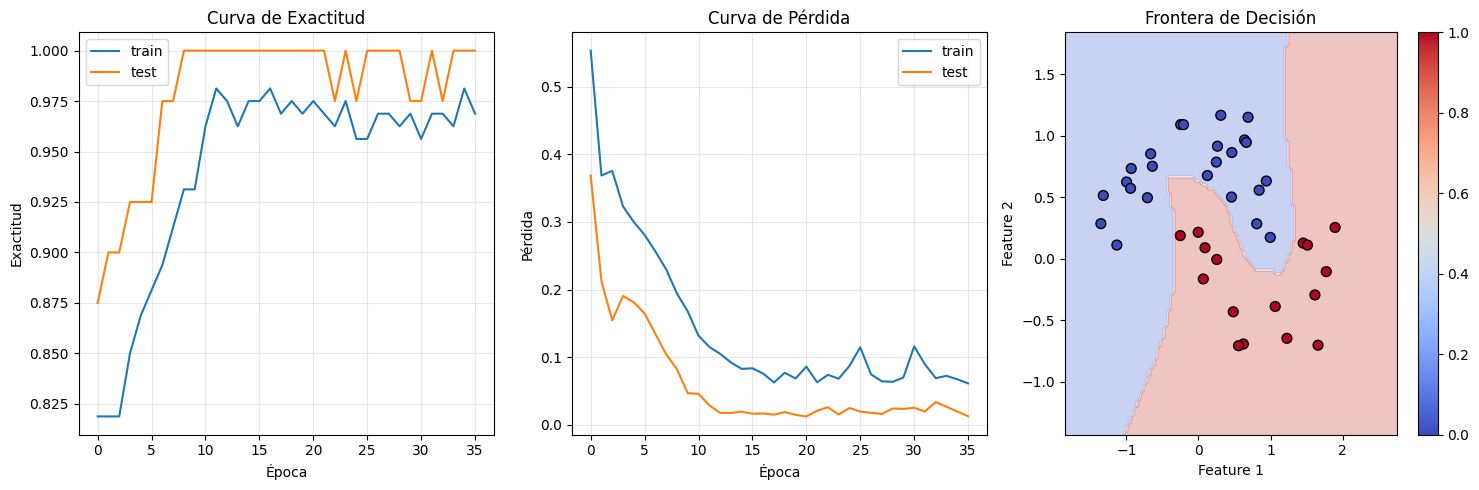

Train: 0.975, Test: 1.000


In [42]:
def build_model(activation_output='sigmoid', loss='binary_crossentropy'):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, input_dim=2, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(16, activation='relu'))
    model.add(keras.layers.Dense(1, activation=activation_output))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    return model


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K.clear_session()
model=build_model()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True) # se usa para evitar seguir haciendo epocas cuando el modelo no esta mejorando
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled,y_test), callbacks=[cb])

_,train_acc=model.evaluate(X_train_scaled,y_train,verbose=0)
_,test_acc=model.evaluate(X_test_scaled,y_test,verbose=0)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Curva de Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(132)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

# Frontera de decisión
plt.subplot(133)
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100),
    np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)  
Z = model.predict(grid_points_scaled)
Z = (Z > 0.5).astype(int).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
           cmap=plt.cm.coolwarm, edgecolors='k', s=50)
plt.title('Frontera de Decisión')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()
print(f'Train: {train_acc:.3f}, Test: {test_acc:.3f}')

## Pregunta 2

Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

Epoch 1/100


/home/camilo/UdeA/2025-1/aprendizaje_estadistico/labs/labs_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1559 - loss: 1.8822 - val_accuracy: 0.1475 - val_loss: 1.8083
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2171 - loss: 1.7813 - val_accuracy: 0.2949 - val_loss: 1.7317
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3072 - loss: 1.7155 - val_accuracy: 0.3272 - val_loss: 1.6727
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3372 - loss: 1.6616 - val_accuracy: 0.3917 - val_loss: 1.6206
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3834 - loss: 1.6116 - val_accuracy: 0.4240 - val_loss: 1.5697
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4145 - loss: 1.5617 - val_accuracy: 0.4470 - val_loss: 1.5251
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4665 - loss: 1.5149 - val_accuracy: 0.4747 - val_loss: 1.4767
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5127 - loss: 1.4664 - val_accuracy: 0.5392 - val_loss: 1.

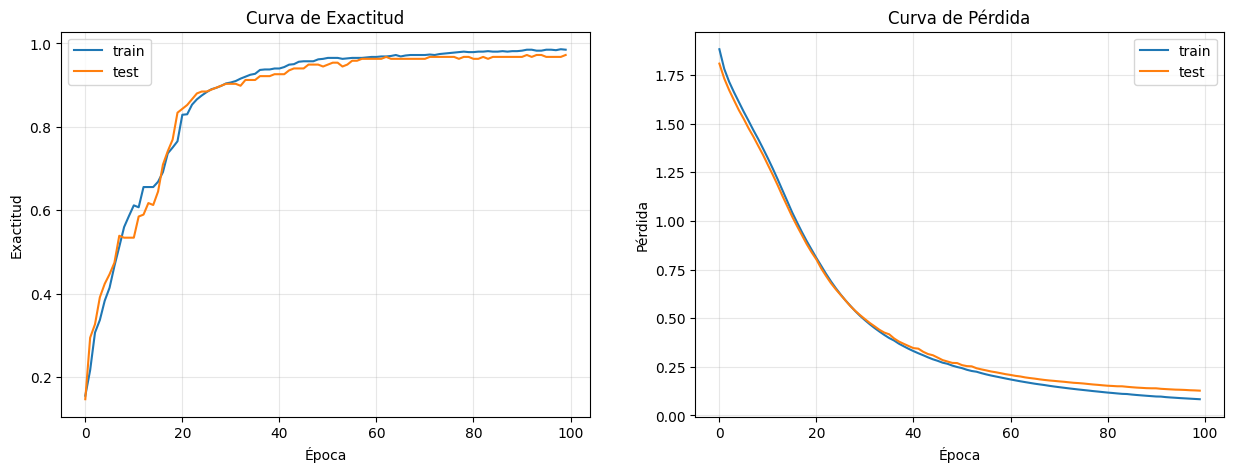

Train: 0.988, Test: 0.972


In [39]:
digits=load_digits(n_class=6)
X,y=digits.data, digits.target
X=X/16
n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def build_model2(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(4, input_dim=64, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(6, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

K.clear_session()
model=build_model2(activation='softmax', loss='sparse_categorical_crossentropy')

cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True) 
history=model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100,verbose=1, callbacks=[cb])



_, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)


plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Curva de Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(122)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print(f'Train: {train_acc:.3f}, Test: {test_acc:.3f}')